<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK12_2%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 k-평균 알고리즘의 이해

K평균은 군집화에서 가장 일반적으로 사용되는 알고리즘/ 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스 반복 수행

더이상 중심점 이동이 없을 경우 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

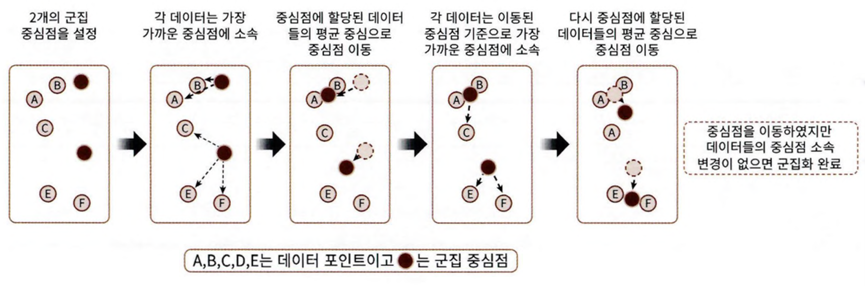

* 장점
  * 알고리즘이 쉽고 간결
* 단점
  * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어져 PCA 차원감소가 필요할 수 있음
  * 반복을 수행하는데 반복 횟수가 많을 경우 수행시간이 매우 느려짐
  * 몇 개의 군집을 선택해야할지 가이드하기 어려움

##사이킷런 KMeans클래스 소개

1. 주요 하이퍼 파라미터
* n_clusters: 군집의 중심점 개수
* init: 초기에 군집 중심점의 좌표를 설정할 방식/일반적으로  k-means++
* max_iter: 최대 반복 횟수/ 이 횟수 이전에 중심점 이동이 없으면 종료

2. 주요 속성 정보
* labels_:각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_:각 군집 중심점 좌표/Shape는 [군집 개수, 피처 개수]

##K-평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris=load_iris()
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length',
                                            'sepal_width','petal_length',
                                            'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
#초기중심 설정, 최대 반복 횟수 디폴트 값/ 3개로 군집화
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


각 데이터가 어떤 중심에 속하는지 알 수 있음

실제 붓꽃 분류 값과 얼마나 차이 나는지 확인

In [7]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


군집 시각화
2차원 평면상에서 시각적으로 표현하기 위해 PCA 로 4개의 속성을 2개로 차원축소 후 표현

In [8]:
#군집 시각화
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


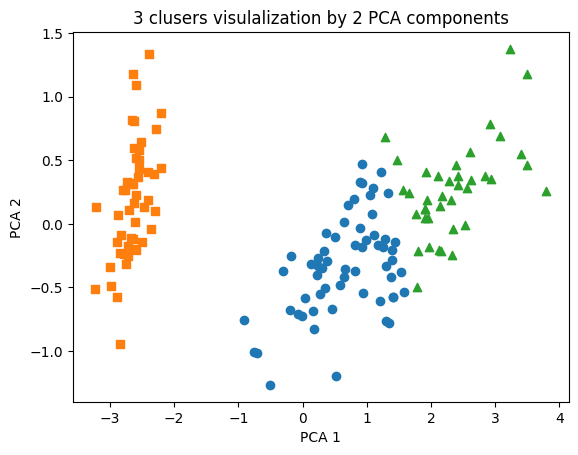

In [9]:
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],
            y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],
            y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],
            y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusers visulalization by 2 PCA components')
plt.show()

1은 잘 분리 0,2는 명확히 분리 X

##군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런 군집화 알고리즘 테스트해보기 위한 데이터 생성기 제공: make_blobs()-개별 군집의 중심점과 표준편차 제어 기능, make_classification()-노이즈를 포함한 데이터를 만드는데 유용

하나의 클래스에 여러개의 군집이 분포될 수 있게 데이터 생성

make_circle(), make_moon() API는 중심 기반
의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용

- make_blobs() 호출 파라미터
* n_samples： 생성할 총 데이터의 개수/ 디폴트는 100개
* n_features: 데이터 피처 개수/시각화를 목표로 할 경우 2개로 설정
* centers: int값 예를 들어 3으로 설정하면 군집의 개수를 나타내고 ndarray형태로 표현할 경우 개별 군집 중심점의 좌표 의미
* cluster_std: 생성될 군집 데이터의 표준 편차/float값 지정시 군집 내 표준편차가 해당 값이고 [0.8,0.6,0.5]이런 식으로 입력시 군집별로 서로 다른 표준편차 가진 데이터셋

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


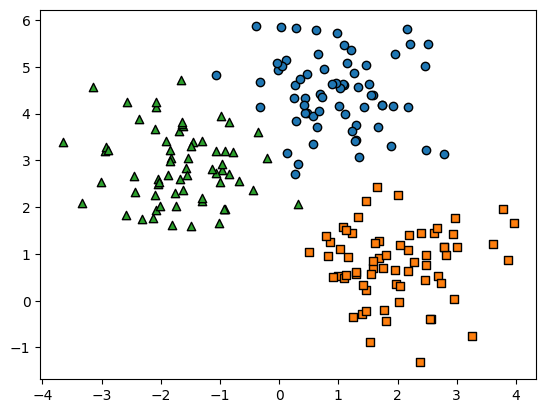

In [15]:
#만들어진 피처 데이터 세트 군집화 분포 확인
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',
              marker=markers[target])
plt.show()

k평균 군집화 한 후 시각화

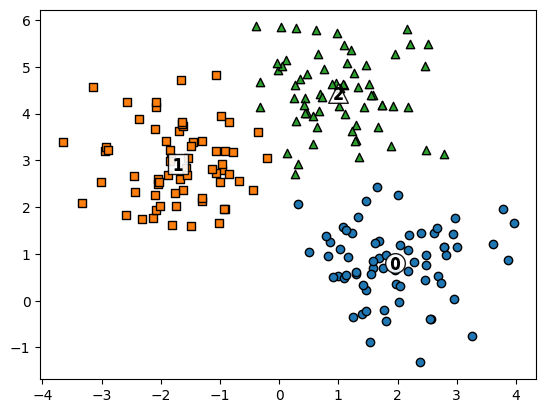

In [16]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_label=np.unique(cluster_labels)

markers=['o','s','^','P','D','H','x']
for label in unique_label:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
              marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',
              marker='$%d$'%label)
plt.show()

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


대부분 잘 매핑됨

표준편차 크게 설정할수록 데이터 퍼짐

#02 군집 평가

대부분의 군집화 데이터세트는 이렇게 비교할만한 타깃 레이블을 가지지 않음

군집화는 분류와 유사해 보일 수 있으나 많이 다름. 데이터 내에 숨어있는 별도의 그룹을 찾아내서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가짐

비지도 학습의 특성상 어떠한 지표라도 정확하게 성능 평가하기 어려움

그럼에도 군집화의 성능을 평가하는 대표적인 방법: 실루엣 분석

## 실루엣 분석의 개요

각 군집간 거리가 얼마나 효율적으로 분리돼있는지 나타냄

효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리 데이터는 서로 가깝게 잘 뭉쳐있다는 의미

실루엣 계수: 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지 나타내는 지표

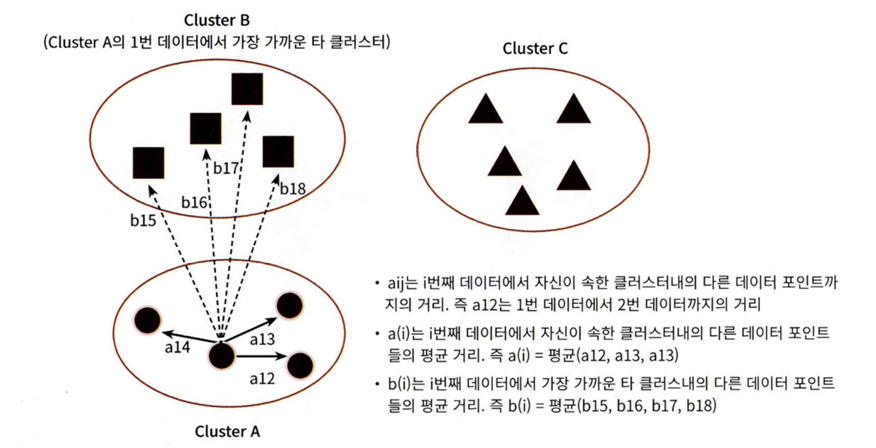

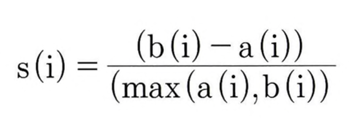



실루엣 계수는 -1~1 사이 값을 가지며 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것 0에 가까울수록 근처의 군집과 가까워진다는 것

-값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미

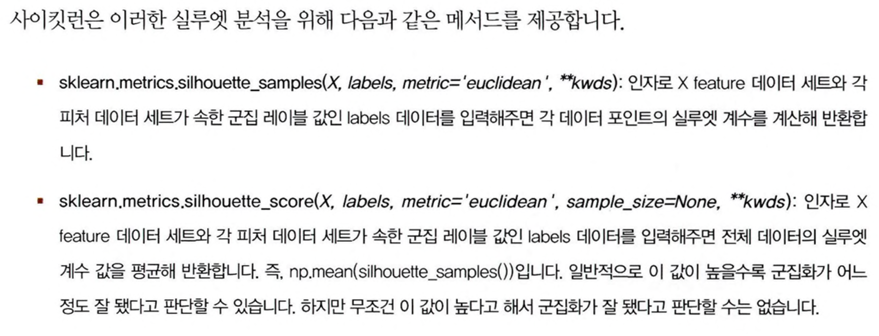

>> 좋은 군집화: 전체 실루엣 계수의 평균값이 0-1사이 값을 가지며 1에 가까울수록 좋음


>> 개별 군집의 평균값 편차가 크지 않아야함 즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않아야함

##붓꽃 데이터 세트를 이용한 군집 평가

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples()return 값의 shape',score_samples.shape)

irisDF['silhouette_coeff']=score_samples

average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples()return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [3]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


##군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 K-평균의 적절한 군집개수가 설정되었다고 판단 가능

평균 실루엣 계수로 군집 개수 최적화

n=2일때 평균 실루엣 계수가 더 크지만n=4일때 평균 실루엣 계수가 비교적 균일하여 가장 이상적인 군집화 개수

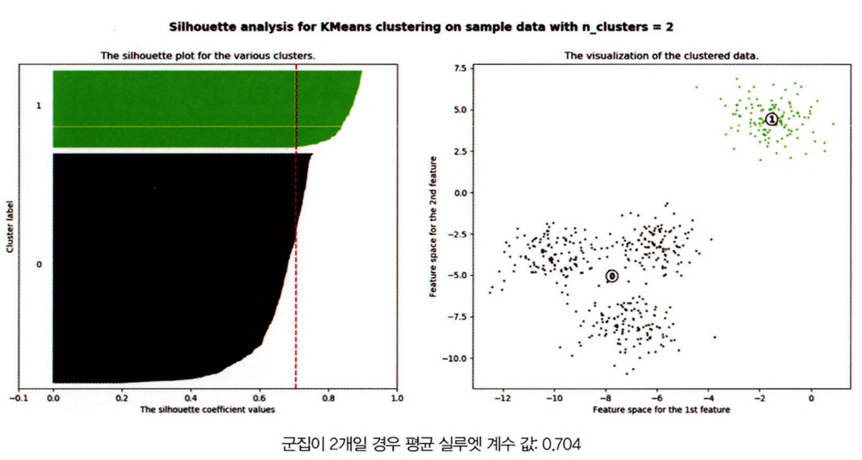

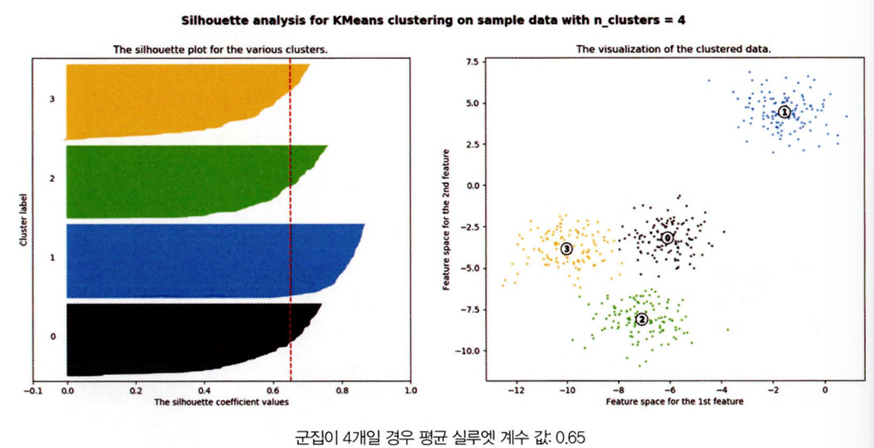

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_silhouette(cluster_list, X):
    for n_clusters in cluster_list:
        fig, ax1 = plt.subplots(1)
        fig.set_size_inches(6, 4)

        # 설정
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # KMeans 학습
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(X)

        # 실루엣 점수 계산
        silhouette_vals = silhouette_samples(X, cluster_labels)
        silhouette_avg = silhouette_score(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_silhouette_vals = silhouette_vals[cluster_labels == i]
            ith_silhouette_vals.sort()

            size_cluster_i = ith_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0, ith_silhouette_vals,
                facecolor=color, edgecolor=color, alpha=0.7
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        plt.tight_layout()
        plt.show()


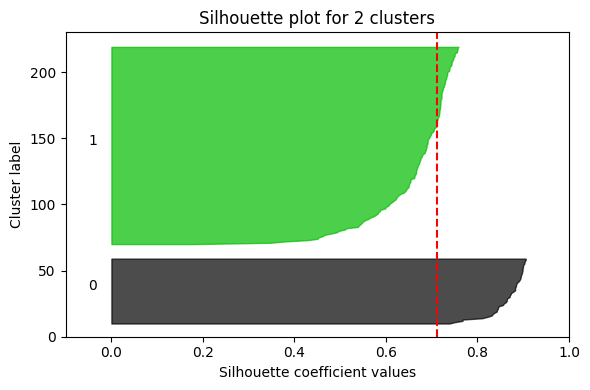

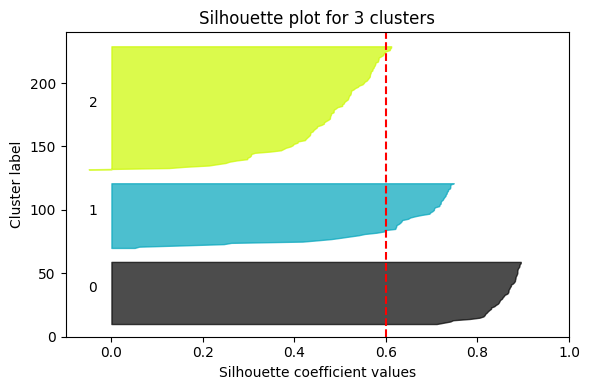

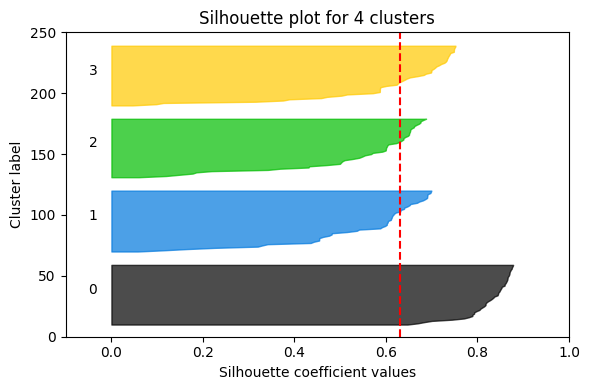

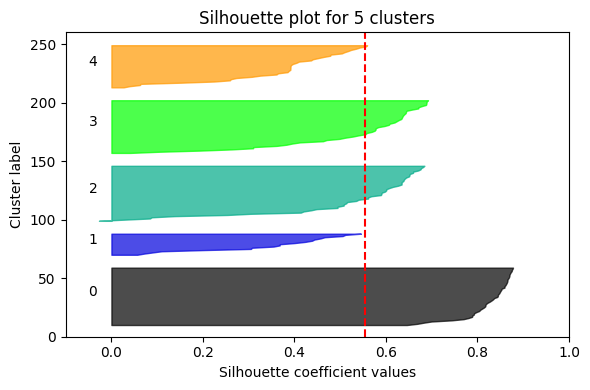

In [5]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=200,
               n_features=2,centers=4,cluster_std=1,
               center_box=(-10.0,10.0),shuffle=True,random_state=1)
visualize_silhouette([2,3,4,5],X)

4개 군집일때 최적

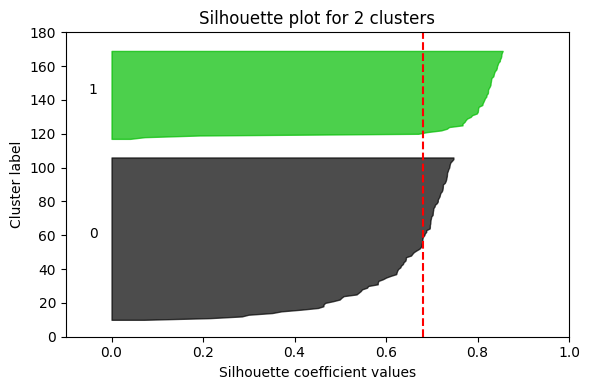

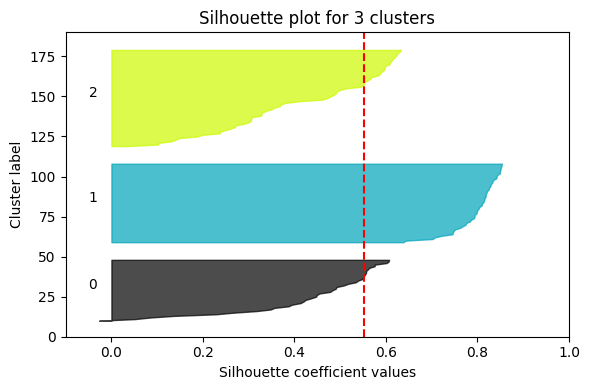

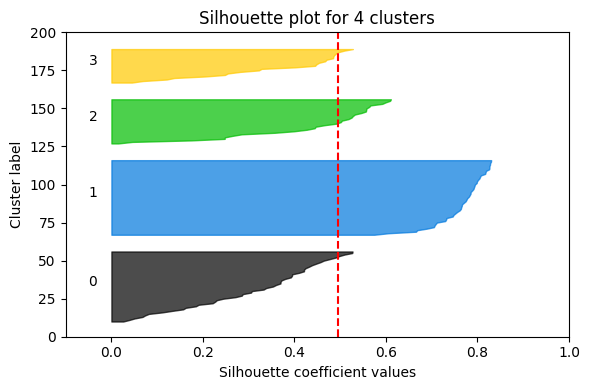

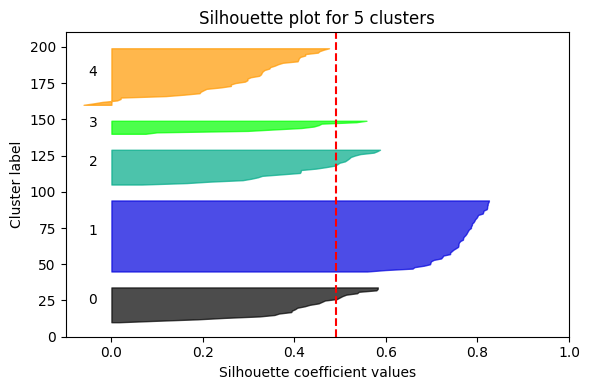

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

2개로 하는 것이 가장 좋아보임